# Water Quality Prediction Project Code

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, optimizers, layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv(r"E:\Study DATA\Deep learning Projects\Water_Quality_Prediction_Project\Dataset\water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [4]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
value=data["Potability"].value_counts()
total_value=len(data["Potability"])
print("Counts:\n",value)
print("Total Values: ",total_value)

Counts:
 0    1998
1    1278
Name: Potability, dtype: int64
Total Values:  3276


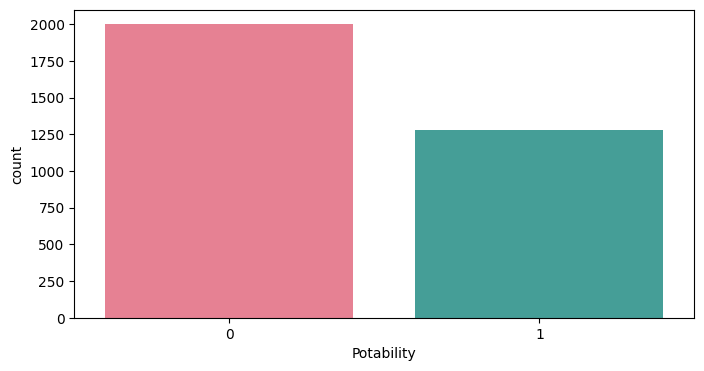

In [7]:
plt.figure(figsize=(8, 4))
sns.countplot(x="Potability", data=data, palette='husl');

In [8]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


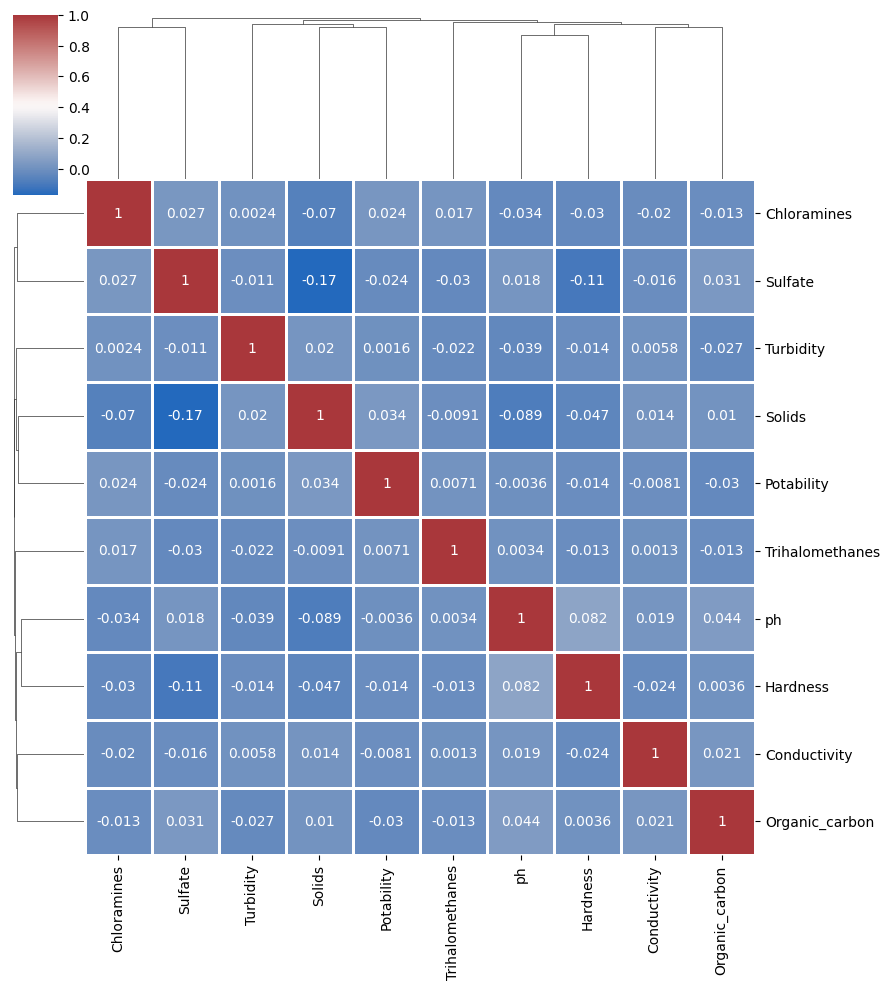

In [9]:
sns.clustermap(data.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidth = 0.8, figsize = (9,10))
plt.show()

In [10]:
data.isnull().values.any()

True

In [11]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

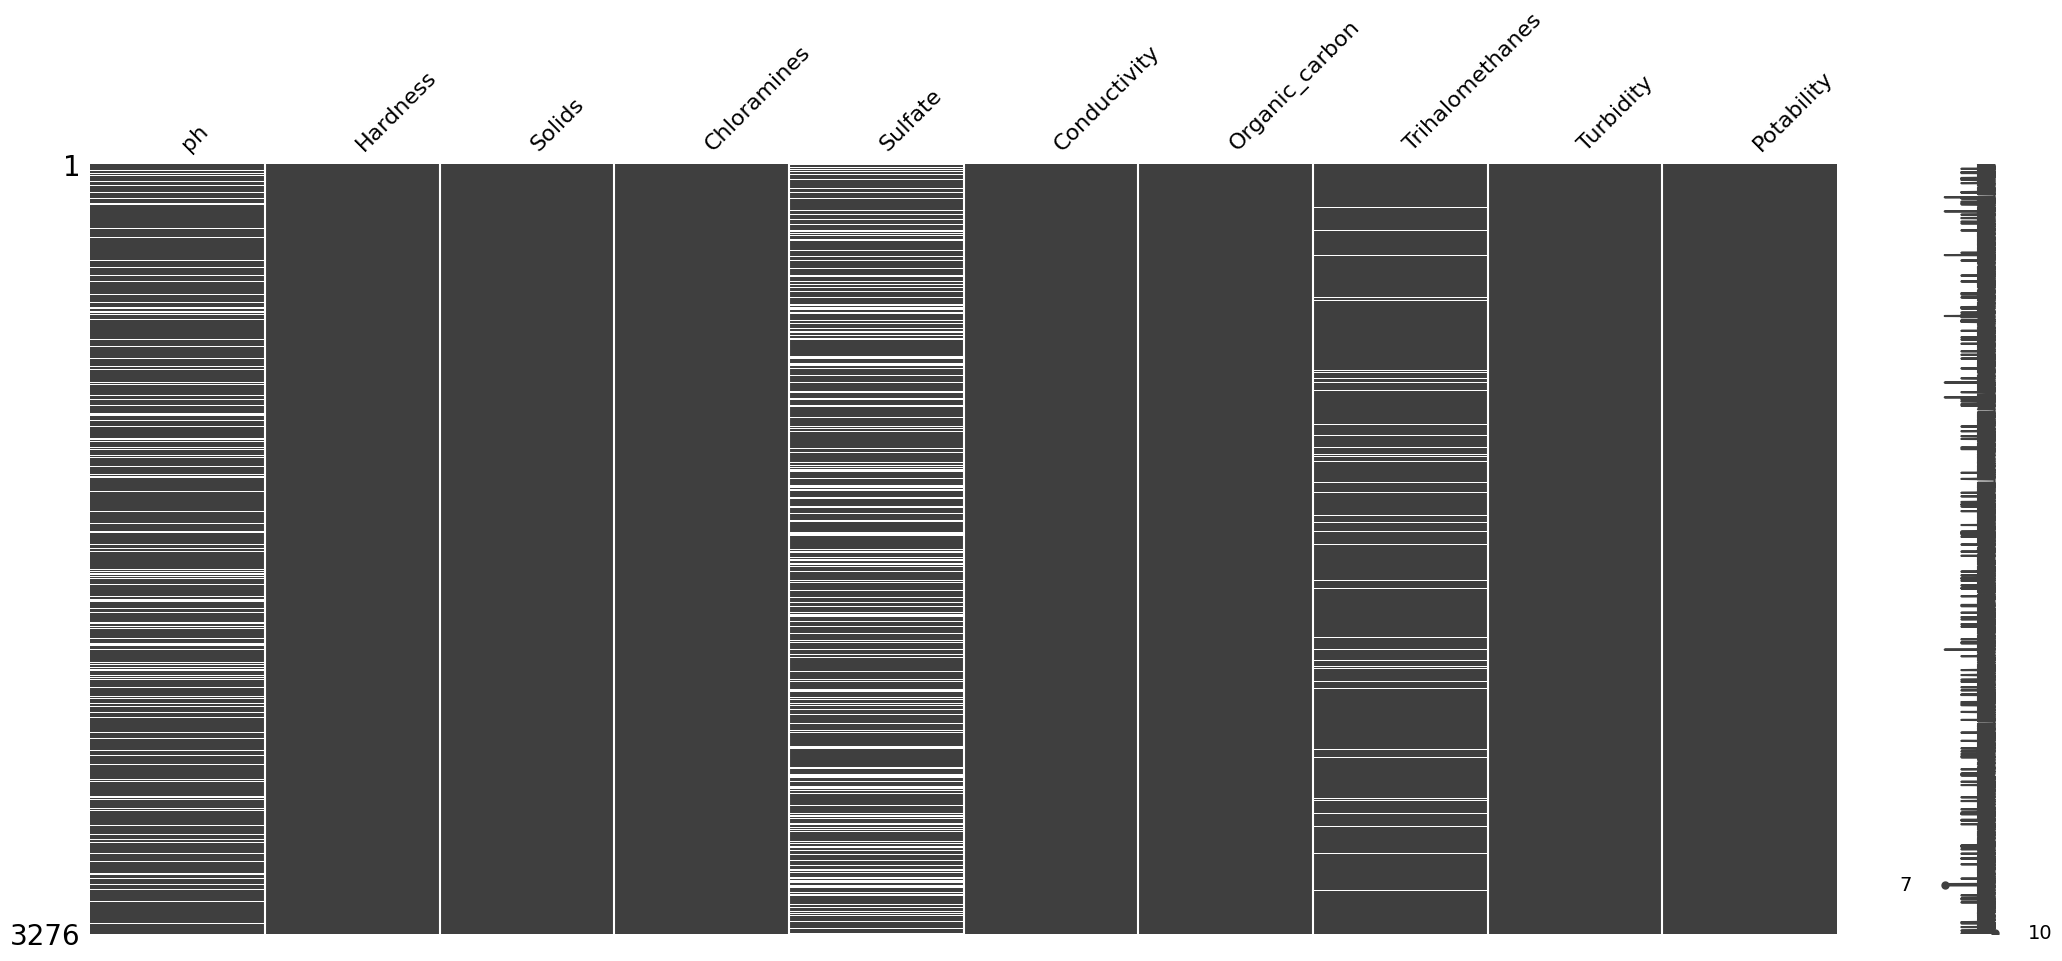

In [12]:
import missingno as msno

msno.matrix(data)
plt.show()

# Handle missing value with average of features

## Simple method to handle missing Value

data["ph"].fillna(value=data["ph"].mean(), inplace=True)


data["Sulfate"].fillna(value=data["Sulfate"].mean(), inplace=True)

data["Trihalomethanes"].fillna(value=data["Trihalomethanes"].mean(), inplace=True) 

In [13]:
#Fill'ph' features NAN value
#.loc is dataframe.loc[row_indexer, column_indexer]

phMean0 = data[data['Potability'] == 0]['ph'].mean(skipna=True)
data.loc[(data['Potability'] == 0) & (data['ph'].isna()), 'ph'] = phMean0

phMean1 = data[data['Potability'] == 1]['ph'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['ph'].isna()), 'ph'] = phMean1



#fill'Sulfate' features NAN value 

SulfateMean0 = data[data['Potability'] == 0]['Sulfate'].mean(skipna=True)
data.loc[(data['Potability'] == 0) & (data['Sulfate'].isna()), 'Sulfate'] = SulfateMean0

SulfateMean1 = data[data['Potability'] == 1]['Sulfate'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Sulfate'].isna()), 'Sulfate'] = SulfateMean1



#fill "Trihalomethanes" features NAN value

TrihalomethanesMean0 = data[data['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
data.loc[(data['Potability'] == 0) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean0

TrihalomethanesMean1 = data[data['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = TrihalomethanesMean1

In [14]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

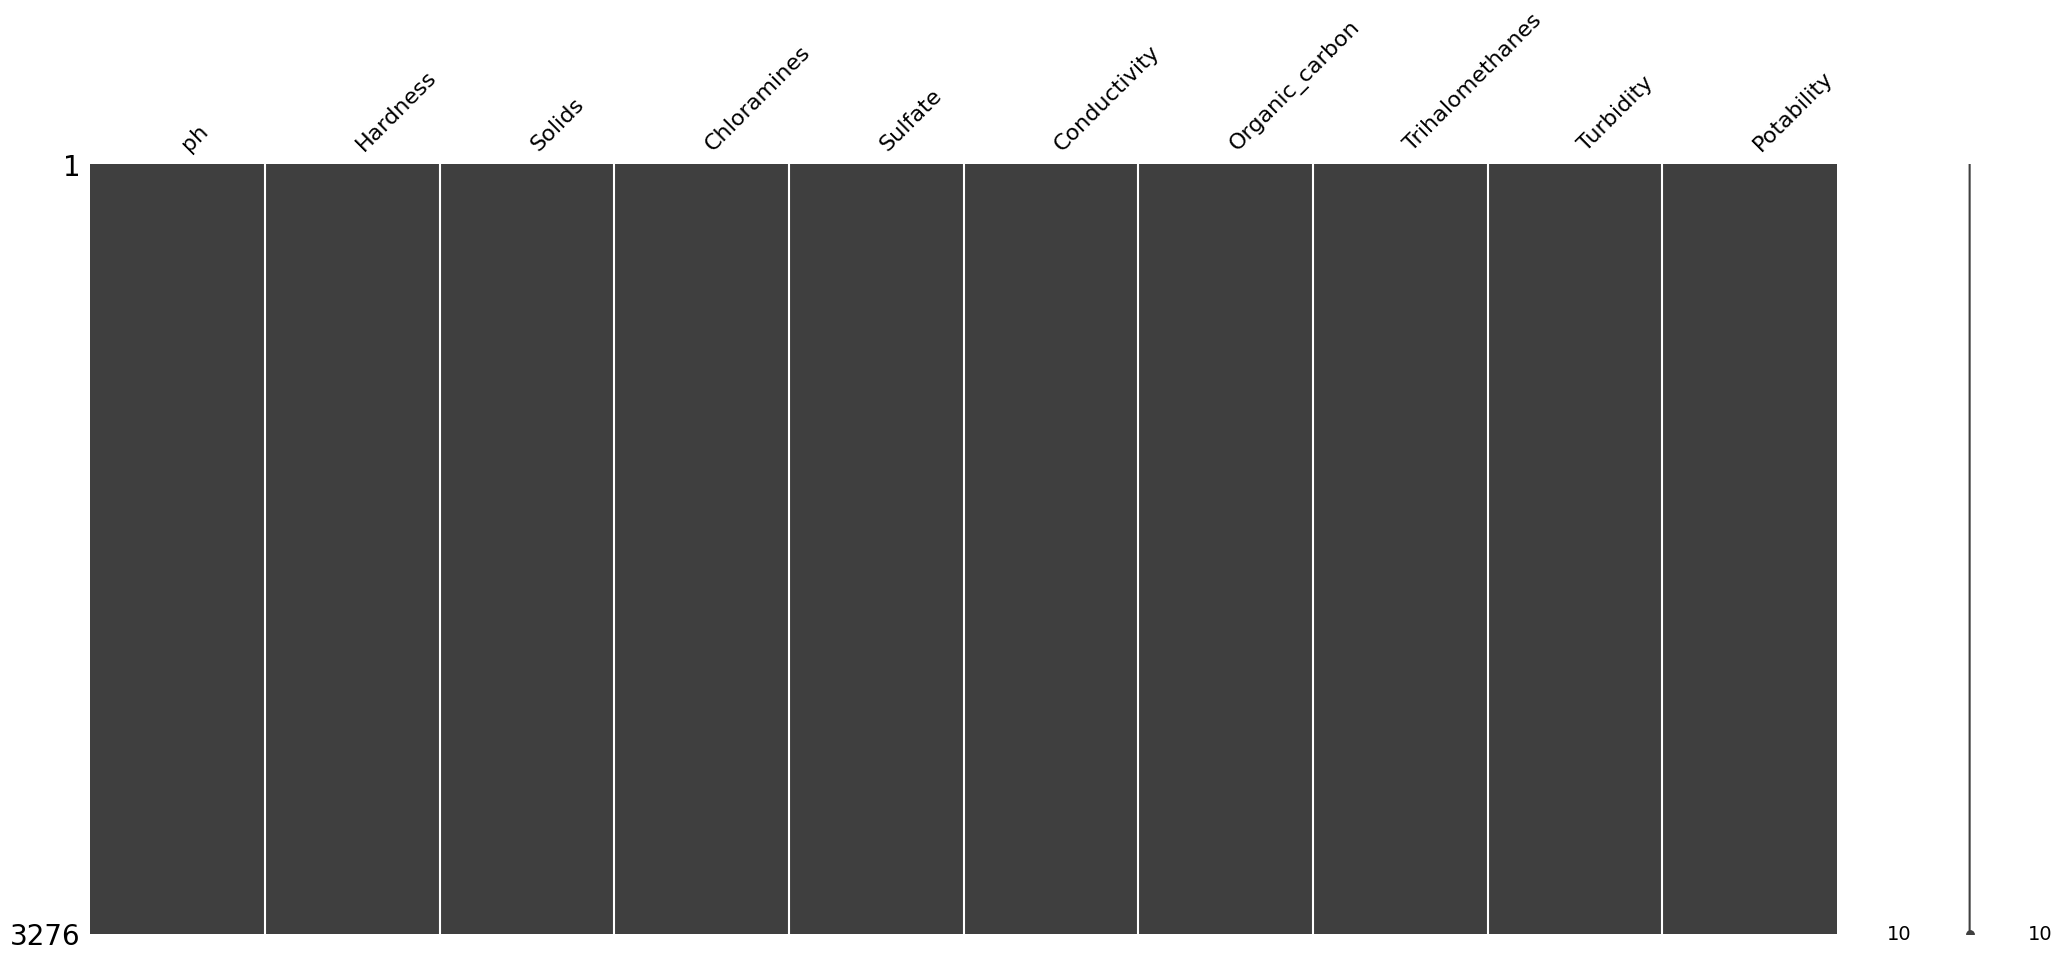

In [15]:
msno.matrix(data)
plt.show()

In [16]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Preprocessing: Normalization and Train Test Split 

In [17]:
features=data.drop("Potability", axis=1).values
labels= data["Potability"].values

print(features[0])
print(labels[0])

[7.08537844e+00 2.04890455e+02 2.07913190e+04 7.30021187e+00
 3.68516441e+02 5.64308654e+02 1.03797831e+01 8.69909705e+01
 2.96313538e+00]
0


In [18]:
print(type(features))
print(type(labels))

features[0]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([7.08537844e+00, 2.04890455e+02, 2.07913190e+04, 7.30021187e+00,
       3.68516441e+02, 5.64308654e+02, 1.03797831e+01, 8.69909705e+01,
       2.96313538e+00])

In [19]:
scaler= StandardScaler()
features=scaler.fit_transform(features)

print(features[0])

[ 0.00307769  0.25919471 -0.13947087  0.11241485  0.96101664  1.70895423
 -1.18065057  1.30618721 -1.28629758]


In [20]:
train_data, test_data, train_labels, test_labels= train_test_split(features, labels, test_size=0.20, random_state=30)

print("train_data: ",train_data.shape)
print("test_data: ",test_data.shape)
print("train_labels: ",train_labels.shape)
print("test_labels: ",test_labels.shape)

train_data:  (2620, 9)
test_data:  (656, 9)
train_labels:  (2620,)
test_labels:  (656,)


## Imbalance DataHandling 

In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
counter = Counter(train_labels)

print('Before SMOTE', counter)
train_data, train_labels = smt.fit_resample(train_data, train_labels)
counter = Counter(train_labels)
print('\nAfter SMOTE', counter)

Before SMOTE Counter({0: 1607, 1: 1013})

After SMOTE Counter({0: 1607, 1: 1607})


# Model Architecture 

In [22]:
model=models.Sequential()

model.add(layers.Dense(256, activation='relu', input_shape=(9,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss="binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [24]:
model.fit(train_data, train_labels, epochs=500, batch_size=25)

Epoch 1/500
129/129 [==============================] - 2s 3ms/step - loss: 0.7042 - accuracy: 0.4932 - precision: 0.4924 - recall: 0.4431
Epoch 2/500
129/129 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.4897 - precision: 0.4891 - recall: 0.4617
Epoch 3/500
129/129 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5184 - precision: 0.5196 - recall: 0.4866
Epoch 4/500
129/129 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5258 - precision: 0.5260 - recall: 0.5233
Epoch 5/500
129/129 [==============================] - 1s 4ms/step - loss: 0.6943 - accuracy: 0.5187 - precision: 0.5191 - recall: 0.5084
Epoch 6/500
129/129 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5162 - precision: 0.5152 - recall: 0.5501
Epoch 7/500
129/129 [==============================] - 1s 4ms/step - loss: 0.6840 - accuracy: 0.5476 - precision: 0.5456 - recall: 0.5694
Epoch 8/500
129/129 [=============

In [25]:
loss, acc, pre,recal=model.evaluate(test_data, test_labels)

21/21 [==============================] - 1s 5ms/step - loss: 0.6752 - accuracy: 0.6448 - precision: 0.5611 - recall: 0.5547


In [28]:
print("Test Loss: ",loss )
print("Test Accuracy: ",acc )
print("Test Precision: ",pre )
print("Test Recall: ",recal )

Test Loss:  0.6751850247383118
Test Accuracy:  0.644817054271698
Test Precision:  0.5610687136650085
Test Recall:  0.5547170042991638


In [29]:
model.save(r"E:\Study DATA\Deep learning Projects\Water_Quality_Prediction_Project\Update_Water_Quality_Prediction_Model.h5")

In [34]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\TANZEE~1\AppData\Local\Temp\tmpk5a1td7f\assets


In [35]:
with open(r"E:\Study DATA\Deep learning Projects\Water_Quality_Prediction_Project\Update_Water_Quality_Prediction_Model.tflite", 'wb') as f:
    f.write(tflite)

In [36]:
value=[10.584,254.37,33424,10.99,364.48,391.184,13.38,00.341,4.628]
v=np.expand_dims(value, axis=0)

In [39]:
pre=model.predict(v)
pre=np.argmax(pre)
pre

1/1 [==============================] - 0s 59ms/step


0